# Save trajectories for EMOT

In [3]:
index=['subj_id', 'task', 'trial_no']

choices = pd.read_csv(os.path.join(data_path, 'choices_processed.txt'))
dynamics = pd.read_csv(os.path.join(data_path, 'dynamics_processed.txt'))

choices = choices.set_index(index, drop=False)
dynamics = dynamics.set_index(index, drop=False)

In [4]:
choices['id'] = choices.apply(lambda x:'%s_%s_%s' % (str(x['subj_id']),
                                                     x['task'],
                                                     str(x['trial_no']).zfill(2)),axis=1)
dynamics = dynamics.join(choices.id).reset_index(drop=True)

In [5]:
dynamics_transposed_x = dynamics.groupby('id')['x'].apply(lambda df: df.reset_index(drop=True)).unstack()
dynamics_transposed_y = dynamics.groupby('id')['y'].apply(lambda df: df.reset_index(drop=True)).unstack()

In [7]:
dynamics_transposed_x.to_csv(os.path.join(data_path, 'dynamics_x_for_emot.txt'), index=True)
dynamics_transposed_y.to_csv(os.path.join(data_path, 'dynamics_y_for_emot.txt'), index=True)

In [8]:
emot_results = pd.read_csv(os.path.join(data_path, 'beyond_reach_emot_results.csv'), 
                           header=None, names=['psi', 'xi', 'zeta_1', 'zeta_2']).set_index(choices.index)

In [9]:
choices = choices.join(emot_results).drop(['id'], axis=1)

choices_walking = choices.loc[choices.task=='walking', :]
choices_mouse = choices.loc[choices.task=='mouse', :]

## EMOT analysis

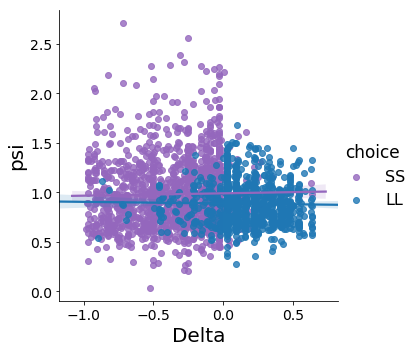

In [25]:
sns.lmplot(data=choices_walking, x='Delta', y='psi', hue='choice', palette=['C4', 'C0'])

In [19]:
choices_mouse.loc[choices_mouse.choice=='SS', 'xi'].values

array([0.3551  ,      nan, 0.019822, ..., 0.71862 , 1.4472  , 0.67617 ])

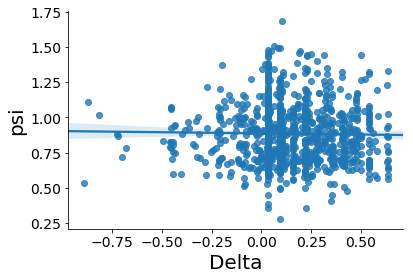

In [27]:
sns.regplot(data=choices_walking[choices_walking.choice=='LL'], x='Delta', y='psi')

In [ ]:
choices_mouse.loc[choices_mouse.choice=='SS', ['Delta', 'xi']].corr()

In [22]:
np.ma.corrcoef(choices_mouse.loc[choices_mouse.choice=='SS', 'Delta'].values, 
            choices_mouse.loc[choices_mouse.choice=='SS', 'xi'].values)

masked_array(
  data=[[1.0, --],
        [--, --]],
  mask=[[False,  True],
        [ True,  True]],
  fill_value=1e+20)